## Topic 4. Neural Networks
## Perceptron 

In [1]:
# We start by importing the python libraries required to solve the problems

import numpy as np
import matplotlib
from matplotlib import pylab as plt
import matplotlib.patches as mpatches
from scipy.special import expit


We generate  a dataset of points that belong to two classes and are separated by a line. 

Each instance of the dataset has two variables. Classes are: 0 and 1. 

In [2]:
# Points in Class A
xA = 20 * np.random.rand(50)
shiftA = 20 * np.random.rand(50)
yA = (4 + xA) / 2.0 - shiftA - 0.1

# Points in Class B
xB = 20 * np.random.rand(50)
shiftB = 20 * np.random.rand(50)
yB = (4 + xB) / 2.0 + shiftB + 0.1

# We define our set of observations (the union of points from the two classes)
# We concatenate the vectors
x = np.hstack((xA, xB)).reshape(-1, 1)
y = np.hstack((yA, yB)).reshape(-1, 1)
x_data = np.hstack((x, y))

# In the vector of target values, the first 50 instances belong to one class and the next 50 instances belong 
# to the other class
target_class = np.vstack((np.zeros((50, 1)),np.ones((50, 1))))

Function PrintDecisionFunction will be used to visualize the decision functions learned by different ML algorithms.

In [3]:
def PrintDecisionFunction(coefs, intersect, xA, yA, xB, yB, x):

     fsize = 14
     
    # The decision function is computed using the coefficients and intersect learned
     # by the algorithm
     decision_function = intersect - coefs[0] * x / coefs[1] 
        
     fig = plt.figure()
    
     # The decision function is plotted
     plt.plot(x, decision_function, 'y*', lw=4)
        
     # The points from the two classes are plotted
     plt.plot(xA, yA, 'ro', lw=4)
     plt.plot(xB, yB, 'bs', lw=4)


     blue_patch = mpatches.Patch(color='blue', label='Class I')
     red_patch = mpatches.Patch(color='red', label='Class II')
     plt.legend(handles=[blue_patch,red_patch])
     plt.xlabel(r'$x$', fontsize=fsize)
     plt.ylabel(r'$y$', fontsize=fsize)

     plt.show()
        
     return fig


## Exercise 1

The  functions included in the following cell implement a perceptron.

1) Complete functions "Make_Predictions" and "Update_Weights".


2) Execute the subsequent cell to visualize how "LearnPerceptron" works.


3) Modify the perceptron algorithm in such a way that it starts from a vector of random weights.

In [4]:
from pdb import set_trace

Number of instances: 100. Number of variables: 2. Plus one variable that represents the bias.
Epoch :1 Error: [0.5] Weights:  [[ 46.51336834 -18.10331964   5.        ]]


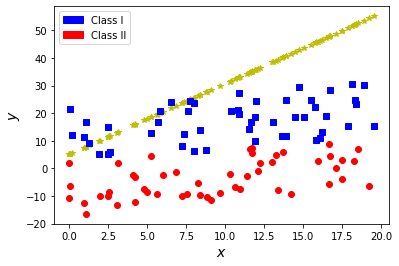

Epoch :2 Error: [0.61] Weights:  [[ 88.2618076  -58.00914826   8.7       ]]


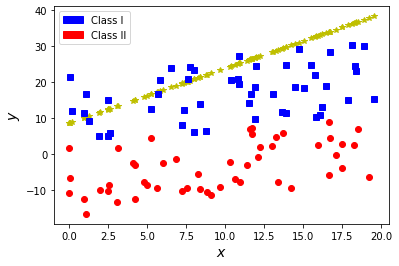

Epoch :3 Error: [0.79] Weights:  [[ 110.72792603 -133.50096781   10.6       ]]


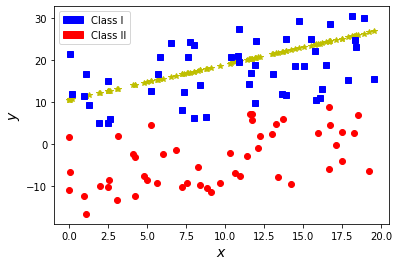

Epoch :4 Error: [0.9] Weights:  [[ 115.32167941 -230.37020588   11.2       ]]


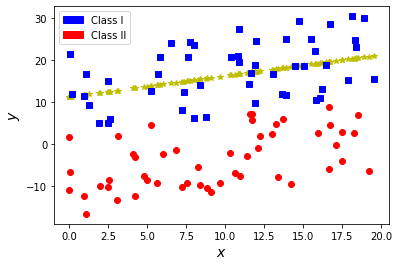

Epoch :5 Error: [0.94] Weights:  [[ 104.58432079 -338.16222046   10.6       ]]


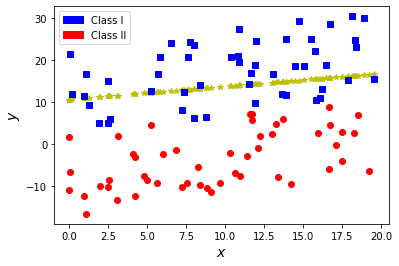

Epoch :6 Error: [0.9] Weights:  [[  88.12373764 -448.31356131    9.6       ]]


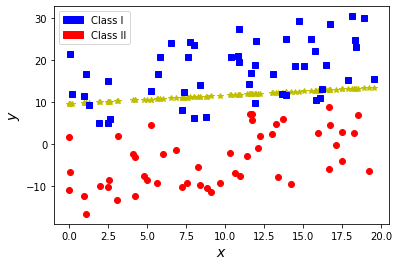

Epoch :7 Error: [0.89] Weights:  [[  69.99177612 -558.91914757    8.5       ]]


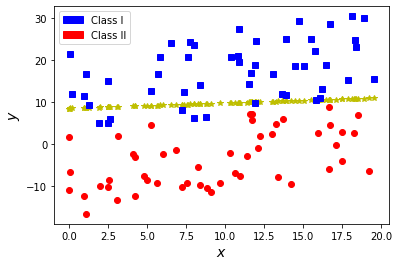

Epoch :8 Error: [0.84] Weights:  [[  44.16434855 -670.78464999    6.9       ]]


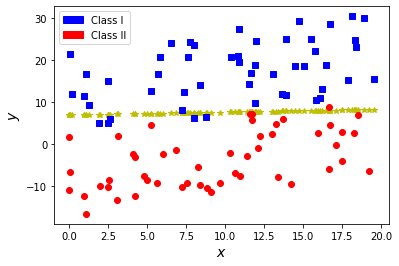

Epoch :9 Error: [0.84] Weights:  [[  18.33692099 -782.65015241    5.3       ]]


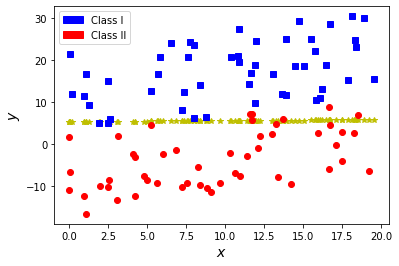

Epoch :10 Error: [0.84] Weights:  [[  -7.49050657 -894.51565483    3.7       ]]


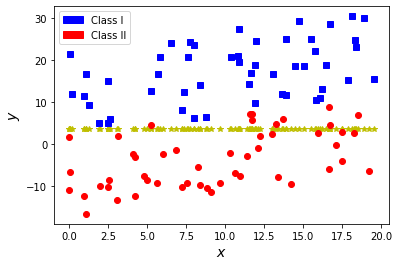

Epoch :11 Error: [0.83] Weights:  [[  -35.02592884 -1006.37600134     2.        ]]


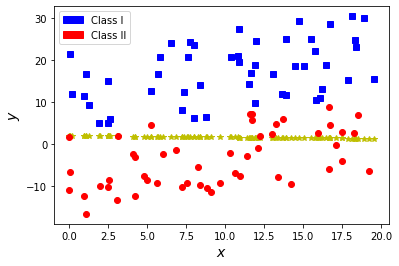

Epoch :12 Error: [0.83] Weights:  [[-6.25613511e+01 -1.11823635e+03  3.00000000e-01]]


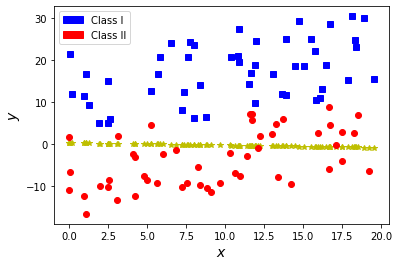

Epoch :13 Error: [0.83] Weights:  [[  -90.09677337 -1230.09669436    -1.4       ]]


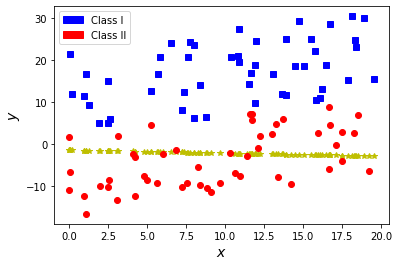

Epoch :14 Error: [0.82] Weights:  [[ -118.8419561 -1341.8746988    -3.2      ]]


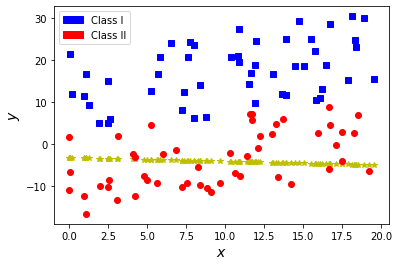

Epoch :15 Error: [0.82] Weights:  [[ -147.58713883 -1453.65270324    -5.        ]]


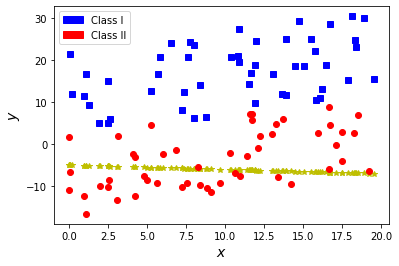

In [40]:
def Init_Weights(nweights):
    weights = np.zeros(shape=(1, nweights))  
    return weights

def heaviside(z):
    '''z: number'''
    return 1 if z >= 0 else 0

def make_pred(ws, xi):
    '''ws: np.array, xi: np.array'''
    return heaviside(np.dot(ws, xi))

def Make_Predictions(weights_, train_data):
    weights = weights_[0]
    return np.array([make_pred(weights, xi) for xi in train_data]).reshape((len(train_data), 1))

# (list, list, list, number)
def Update_Weights2(W_, X, differences, lrate): 
    W = W_[0]
    for j, _ in enumerate(W):
        W[j] += lrate*np.dot(X[:, j], differences)
    return np.array([w for w in W]).reshape(1, len(W))

def Update_Weights(W, X, diffs, lrate):
    for i, x_i in enumerate(X):
        for j, _ in enumerate(W[0]):
            W[0][j] += x_i[j]*lrate*diffs[i]
    return W

def LearnPerceptron(train_data, train_class, learning_rate, number_epochs):
    N = train_data.shape[0]  # Number of instances in the dataset

    # We enlarge the dataset adding a column of ones
    enlarged_train_data = np.hstack((train_data,np.ones((N, 1))))
    
    n = enlarged_train_data.shape[1]  # Number of variables plus the bias  

    print("Number of instances: "+str(N)+". Number of variables: "+str(n - 1)+". Plus one variable that represents the bias.")
    
    weights = Init_Weights(n)  # 1 x n ndarray, [[w1,...,wn]]
    error = 0
    epoch = 0

    while epoch == 0 or (error > 0 and epoch < number_epochs):
        # The perceptron is used to make predictions  
        predicted = Make_Predictions(weights, enlarged_train_data)

        # For each instance, we compute the difference between the prediction and the class   
        all_differences =  predicted - train_class   

        #set_trace()
        # Using the differences the weights are updated        
        weights = Update_Weights(weights, enlarged_train_data, all_differences, learning_rate)       

        epoch += 1        

        # We compute the error
        error = sum(all_differences ** 2) / N
        print("Epoch :" + str(epoch) + " Error: " + str(error) + " Weights: ", weights)      
        fig = PrintDecisionFunction(weights[0, :2], weights[0, 2], xA, yA, xB, yB, x)

    return error, predicted, weights


      
learning_rate = 0.1
number_epochs = 15


my_perceptron_error, my_perceptron_predictions, my_perceptron_weights = LearnPerceptron(
    x_data, target_class, learning_rate, number_epochs)


Executing the following cell you can check how your implementation works

Print the prediction given by the Perceptron Model

In [7]:
print(np.round(my_perceptron_predictions[:, 0]))

print(target_class.T)

[0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1
 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]]


In the following cell we use the scikit-learn implementation of the perceptron and learn the model using our dataset.

In [8]:
from sklearn.linear_model import  Perceptron

clf = Perceptron(max_iter=1000, tol=1e-3, eta0=0.1)
clf.fit(x_data, target_class[:, 0])
coef = clf.coef_
intercept = clf.intercept_
coef, intercept

(array([[-3.09502606,  4.76695537]]), array([-1.8]))

## Exercise 2

Use function "PrintDecisionFunction" to visualize the hyperplane learned by the Perceptron model.


Suggestion: Take a look at the vars() function of the clf object, or the scikit-learn help for the internal parameters of class Perceptron and pass the relevant parameters to function "PrintDecisionFunction".


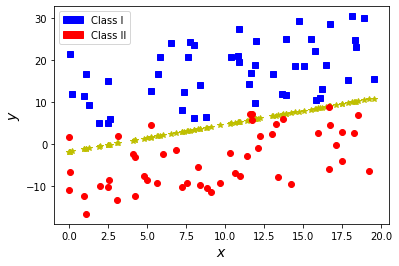

In [9]:
perceptron_fig = PrintDecisionFunction(coef[0], intercept[0], xA, yA, xB, yB, x)


## Exercise 3

In this exercise we will use the "Planning Relax Data Set" available from http://archive.ics.uci.edu/ml/datasets/Planning+Relax#
    
This dataset contains 12 features extracted from the analysis of EEG signals collected for 5 times on various days from a healthy right-handed subject of 25 years of age.  
    
The main aim of the data is to classify each instance between normal relaxed state and movement imagery.
    
This can be seen as a binary classification problem. 
    
    
3.1) Create a pipeline that:
    
 - Imputes the data
    
 - Standarizes the data
    
 - Reduces the set of 12 features to only two features by dimensionality reduction.
    
 - Applies a perceptron to classify between the two classes.
    
3.2) Evaluate the accuracy of the pipeline using the appropriate function of scikit-learn.
    
3.3) Print the confusion matrix produced by your pipeline.
    
3.4) Adapt the implementation of Exercise 1 so that you are able to use it in your pipeline instead of the sklearn Perceptron
   

In [10]:
# The first 12 columns of the file 'plrx.txt' contain the features and the last column is the class. 

dataset = np.loadtxt('plrx.txt')
dataset.shape

(182, 13)

In [11]:
import pandas as pd
from IPython.display import display, HTML, Markdown

df = pd.DataFrame(dataset)
display(df.head())
print(set(dataset[:, -1]))
print(type(dataset[0, -1]))

for row in df.values:
    if any(type(cell) is not np.float64 for cell in row):
        print(row)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.17936,-0.20700,-0.209710,-0.097260,-0.119210,-0.17322,-0.280760,0.223170,0.418660,-0.032886,0.003383,-0.334250,1.0
1,-0.14659,-0.16494,0.249870,-0.073985,0.494940,-0.15633,-0.288910,0.500800,-0.045553,0.050759,-0.017511,0.066959,1.0
2,-0.13131,0.51816,0.432810,0.397890,0.043127,0.56320,-0.013246,-0.062833,-0.883390,-0.040303,0.088057,0.631200,2.0
3,0.64940,0.41878,0.148350,0.333490,-0.219740,0.39891,0.590650,0.077100,-1.107200,-0.367230,0.364680,0.571720,1.0
4,-0.40628,0.11503,0.073336,0.070066,-0.030920,0.15205,-0.191420,-0.580430,-0.102250,0.153750,-0.126950,0.184570,1.0


{1.0, 2.0}
<class 'numpy.float64'>


In [42]:
from sklearn import impute, preprocessing, decomposition, linear_model, impute
from sklearn import metrics


X, y = dataset[:, :-1], dataset[:, -1]

def pipeline_manual_steps():
    X = impute.SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(X)  # useless since all rows are np.float64
    X = preprocessing.StandardScaler().fit_transform(X)
    X = decomposition.PCA(n_components=2).fit_transform(X)
    clf = linear_model.Perceptron(max_iter=1000, tol=1e-3, eta0=0.1)
    clf.fit(X, y)

    y_pred = clf.predict(X)


    metrics.accuracy_score(y, y_pred)

In [43]:
from sklearn.pipeline import Pipeline


def pipeline_test(name_clf, clf, X, y):
    pipe = Pipeline(steps=[
        ('simple imputer', impute.SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('std scale', preprocessing.StandardScaler()),
        ('dim reduction', decomposition.PCA(n_components=2)),
        (name_clf, clf),
    ])

    pipe.fit(X, y)
    y_pred = pipe.predict(X)

    print(metrics.accuracy_score(y, y_pred))
    metrics.confusion_matrix(y, y_pred)
    

pipeline_test('perceptron', linear_model.Perceptron(max_iter=1000, tol=1e-3, eta0=0.1), X, y)


0.6703296703296703


In [44]:
import numpy as np

class MyPerceptron:
    def __init__(self, max_iter=1000, eta0=0.1, verbose=False):
        self.max_iter = max_iter
        self.eta0 = eta0
        self.verbose = verbose
        self.weights = None

    def init_weights(self, nweights):
        weights = np.zeros(shape=(1, nweights))  
        return weights

    def heaviside(self, z):
        '''z: number'''
        return 1 if z >= 0 else 0

    def update_weights(self, X_train, y_train): 
        ''' (list, list, list, number) '''
        mse = 0
        for i, x_i in enumerate(X_train):
            pred = self.make_pred(x_i)
            err = pred - y_train[i]  
            mse += err ** 2
            for j, _ in enumerate(self.weights[0]):
                self.weights[0][j] += self.eta0 * err * x_i[j]
        return mse / X_train.shape[0]

    def make_pred(self, xi):
        '''xi: np.array'''
        z = np.dot(self.weights[0], xi)
        return self.heaviside(z)
    
    def predict(self, X):
        if not all(x == 1.0 for x in X[:, -1]):
            X = np.hstack((X, np.ones((len(X), 1))))
        return self.make_predictions(X)
        
    def make_predictions(self, X_train):
        preds = []
        for xi in X_train:
            pred = self.make_pred(xi)
            preds.append(pred)
        preds = np.vstack(preds)
        return preds

    def fit(self, train_data, train_class):
        N = train_data.shape[0]  # Number of instances in the dataset
        enlarged_train_data = np.hstack((train_data, np.ones((N, 1))))  # append a column of 1 at the end
        n = enlarged_train_data.shape[1]  # Number of variables plus the bias 
        self.weights = self.init_weights(n)  # 1 x n ndarray, [[w1,...,wn]]
        error = 0

        #set_trace()
        for epoch in range(self.max_iter):
            error = self.update_weights(enlarged_train_data, train_class)
            if self.verbose: 
                print("Epoch :" + str(epoch) + " Error: " + str(error) + " Weights: ", self.weights)      
                fig = PrintDecisionFunction(self.weights[0, :2], self.weights[0, 2], xA, yA, xB, yB, x)
            if error <= 0: break

        return error, self.make_predictions(enlarged_train_data), self.weights


In [45]:
perceptron = MyPerceptron(max_iter=15, eta0=0.1, verbose=False)
perceptron.fit(X, np.vstack(y))
print('')

Epoch :0 Error: [1.56593407] Weights:  [[  7.33378953   4.08884612 -19.9       ]]


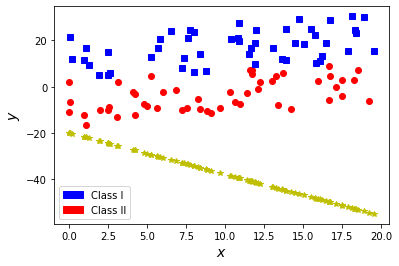

Epoch :1 Error: [1.78021978] Weights:  [[ 10.90121476   7.35307143 -42.1       ]]


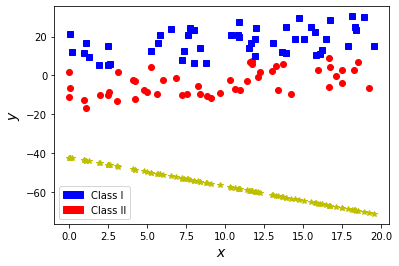

Epoch :2 Error: [1.8021978] Weights:  [[ 13.48227324  10.15285342 -64.7       ]]


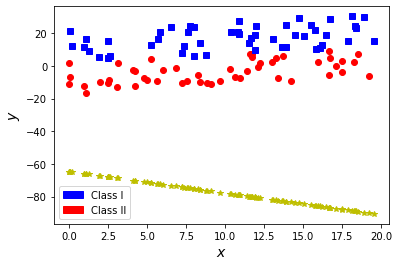

Epoch :3 Error: [1.81318681] Weights:  [[ 15.5770517   12.35560914 -87.5       ]]


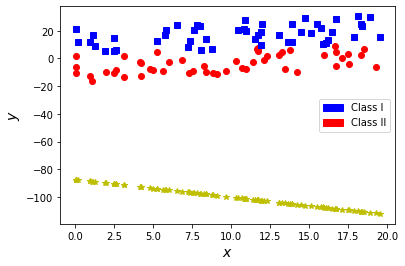

Epoch :4 Error: [1.83516484] Weights:  [[  17.07666699   14.0762526  -110.5       ]]


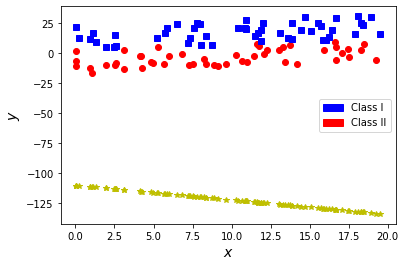

Epoch :5 Error: [1.85714286] Weights:  [[  16.99989272   14.77729924 -133.9       ]]


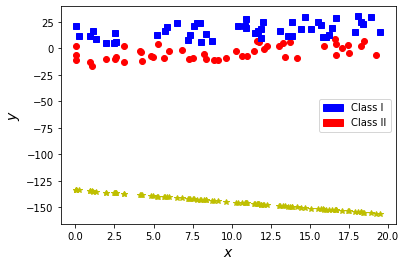

Epoch :6 Error: [1.85714286] Weights:  [[  16.92311845   15.47834588 -157.3       ]]


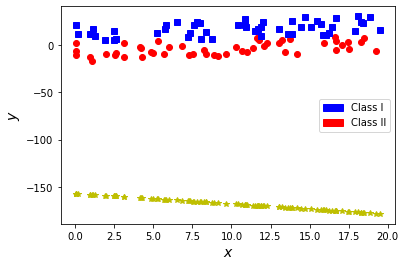

Epoch :7 Error: [1.85714286] Weights:  [[  16.84634418   16.17939253 -180.7       ]]


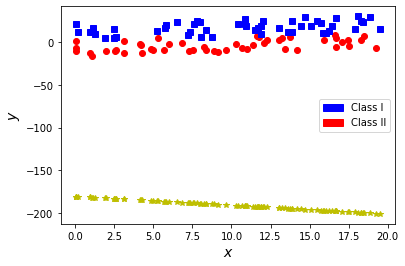

Epoch :8 Error: [1.85714286] Weights:  [[  16.76956991   16.88043917 -204.1       ]]


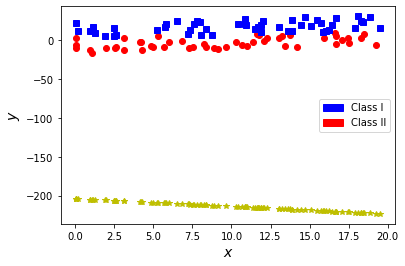

Epoch :9 Error: [1.85714286] Weights:  [[  16.69279564   17.58148581 -227.5       ]]


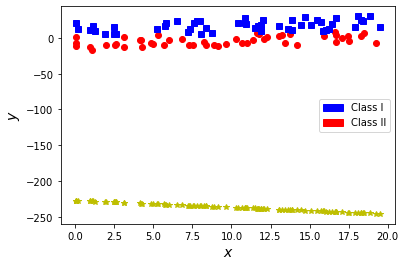

Epoch :10 Error: [1.85714286] Weights:  [[  16.61602138   18.28253245 -250.9       ]]


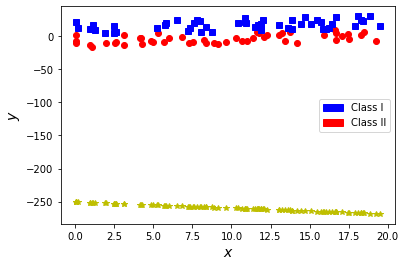

Epoch :11 Error: [1.85714286] Weights:  [[  16.53924711   18.9835791  -274.3       ]]


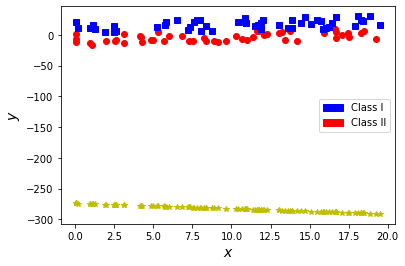

Epoch :12 Error: [1.85714286] Weights:  [[  16.46247284   19.68462574 -297.7       ]]


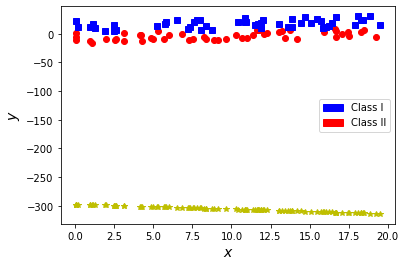

Epoch :13 Error: [1.85714286] Weights:  [[  16.38569857   20.38567238 -321.1       ]]


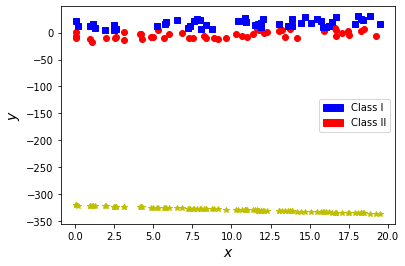

Epoch :14 Error: [1.85714286] Weights:  [[  16.3089243    21.08671902 -344.5       ]]


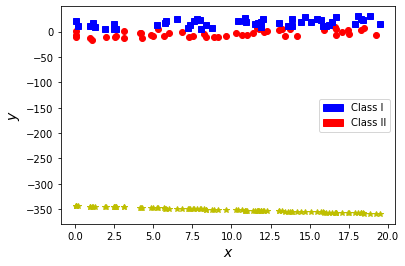

0.0


In [46]:
perceptron = MyPerceptron(max_iter=15, eta0=0.1, verbose=True)

pipeline_test('My first perceptron', perceptron, X, np.vstack(y))

## Exercise 4

Modify the functions defined in Exercise 1 to change the perceptron representation. Instead of adding a column of '1's at the end of the database, treat the *theta* parameter as a separate value from the weights. 

4.1) Modify the values of the parameter *theta* and the learning rate to observe the effect on the final solution.

4.2) Imagine a method that is able to reduce the *size of the steps* given in each iteration of the learning algorithm.
        
        Tip: The size of the steps is regulated by the learning rate multiplier.

In [ ]:
def Init_Weights(nweights):
    weights = np.zeros(shape=(1, nweights))  
    return weights


def Make_Predictions(weights, theta, train_data):
    return preds



def Update_Weights(w, theta, data, differences, lrate): 
    return w, theta
 
    

def LearnPerceptron(train_data, train_class, learning_rate, number_epochs):

   # Number of instances in the dataset
   N = train_data.shape[0]   

   weights = Init_Weights(train_data.shape[1])
   theta = 0
   error = 0
   epoch = 0

   while epoch == 0 or (error > 0 and epoch < number_epochs):
        
      # The perceptron is used to make predictions  
      predicted = Make_Predictions(weights, theta, train_data)
             
      # For each instance, we compute the difference between the prediction and the class   
      all_differences = train_class - predicted      
      
      # Using the differences the weights are updated        
      weights, theta = Update_Weights(weights, theta, train_data, all_differences, learning_rate)       
      
      epoch = epoch + 1        
      
      # We compute the error
      error = sum(all_differences ** 2) / N
      print("Epoch :" + str(epoch) + " Error: " + str(error) + " Weights: ", weights, "Theta:", theta)      
      fig = PrintDecisionFunction(weights[0, :2], theta, xA, yA, xB, yB, x)
    
   return error, predicted, weights
      


In [ ]:
learning_rate = 0.1
number_epochs = 15


my_perceptron_error,my_perceptron_predictions,my_perceptron_weights= LearnPerceptron(x_data, target_class, learning_rate, number_epochs)